In [1]:
# !pip install tensorflow-gpu

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
import tensorflow as tf

import numpy as np
from glob import glob

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '../input/indian-currency-notes-classifier/Train'
valid_path = '../input/indian-currency-notes-classifier/Test'

In [4]:
# useful for getting number of output classes
folders = glob('../input/indian-currency-notes-classifier/Train/*')

In [5]:
folders

['../input/indian-currency-notes-classifier/Train/Twentynote',
 '../input/indian-currency-notes-classifier/Train/1Hundrednote',
 '../input/indian-currency-notes-classifier/Train/5Hundrednote',
 '../input/indian-currency-notes-classifier/Train/2Hundrednote',
 '../input/indian-currency-notes-classifier/Train/Tennote',
 '../input/indian-currency-notes-classifier/Train/Fiftynote',
 '../input/indian-currency-notes-classifier/Train/2Thousandnote']

In [6]:
# Classifier=Sequential()

# Classifier.add(Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
# Classifier.add(MaxPooling2D(pool_size=(2,2)))

# Classifier.add(Conv2D(32,(3,3),activation='relu'))
# Classifier.add(MaxPooling2D(pool_size=(2,2)))

# Classifier.add(Flatten())

# Classifier.add(Dense(units = 128, activation = 'relu'))
# Classifier.add(Dense(units = 7, activation = 'softmax'))
model = tf.keras.applications.InceptionResNetV2(input_shape=(224,224,3),
    include_top=False,
    weights="imagenet")

for layer in model.layers:
    layer.trainable=False
    
x = Flatten()(model.output)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
prediction = Dense(7, activation='softmax')(x)
Classifier = Model(inputs=model.input, outputs=prediction)
Classifier.summary()

219062272/219055592 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
___________________________

In [7]:
callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
    factor=0.1,
    patience=10,
    verbose=1,
    min_delta=0.001)
callback2 = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=8)
# tell the model what cost and optimization method to use
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.000003),
  metrics=['accuracy']
)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True,
                                  vertical_flip=True,
                                  brightness_range=(0.1, 1),
                                  zoom_range=[0.5,1])

test_datagen = ImageDataGenerator(rescale = 1./255,)

In [9]:
training_set = train_datagen.flow_from_directory('../input/indian-currency-notes-classifier/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 12,
                                                 class_mode = 'categorical')

Found 153 images belonging to 7 classes.


In [10]:
test_set = test_datagen.flow_from_directory('../input/indian-currency-notes-classifier/Test',
                                            target_size = (224, 224),
                                            batch_size = 12,
                                            class_mode = 'categorical')

Found 42 images belonging to 7 classes.


In [11]:
# fit the model
from PIL import _imaging
from PIL import Image
import PIL
r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
13/13 [==============================] - ETA: 0s - loss: 2.2727 - accuracy: 0.1373

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:780: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


13/13 [==============================] - 28s 2s/step - loss: 2.2727 - accuracy: 0.1373 - val_loss: 1.9760 - val_accuracy: 0.1667
Epoch 2/20
13/13 [==============================] - 24s 2s/step - loss: 2.1892 - accuracy: 0.1503 - val_loss: 1.9289 - val_accuracy: 0.1905
Epoch 3/20
13/13 [==============================] - 24s 2s/step - loss: 2.1147 - accuracy: 0.1242 - val_loss: 1.9069 - val_accuracy: 0.2857
Epoch 4/20
13/13 [==============================] - 24s 2s/step - loss: 2.0649 - accuracy: 0.1634 - val_loss: 1.9022 - val_accuracy: 0.2619
Epoch 5/20
13/13 [==============================] - 24s 2s/step - loss: 2.0873 - accuracy: 0.1438 - val_loss: 1.9047 - val_accuracy: 0.1905
Epoch 6/20
13/13 [==============================] - 24s 2s/step - loss: 2.0892 - accuracy: 0.1830 - val_loss: 1.9008 - val_accuracy: 0.1905
Epoch 7/20
13/13 [==============================] - 24s 2s/step - loss: 1.9981 - accuracy: 0.1634 - val_loss: 1.8989 - val_accuracy: 0.2143
Epoch 8/20
13/13 [=============

In [12]:
r.history

{'loss': [2.2726924419403076,
  2.1892123222351074,
  2.1147258281707764,
  2.0648927688598633,
  2.08725643157959,
  2.0892090797424316,
  1.9981111288070679,
  2.084059476852417,
  2.035240888595581,
  1.9524929523468018,
  1.971300482749939,
  1.9748265743255615,
  1.9554507732391357,
  1.9269684553146362,
  1.9419087171554565,
  2.0217041969299316,
  1.9563841819763184,
  1.8656352758407593,
  1.9278656244277954,
  1.909108281135559],
 'accuracy': [0.13725490868091583,
  0.15032680332660675,
  0.12418300658464432,
  0.16339869797229767,
  0.1437908560037613,
  0.18300653994083405,
  0.16339869797229767,
  0.13071896135807037,
  0.15032680332660675,
  0.16339869797229767,
  0.16993464529514313,
  0.1437908560037613,
  0.2222222238779068,
  0.18300653994083405,
  0.16339869797229767,
  0.18300653994083405,
  0.23529411852359772,
  0.2222222238779068,
  0.20261438190937042,
  0.23529411852359772],
 'val_loss': [1.9760023355484009,
  1.9288933277130127,
  1.9068788290023804,
  1.902202

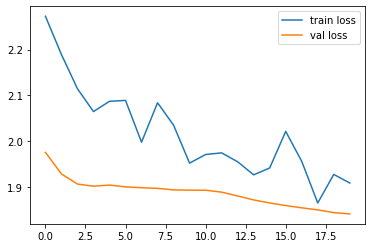

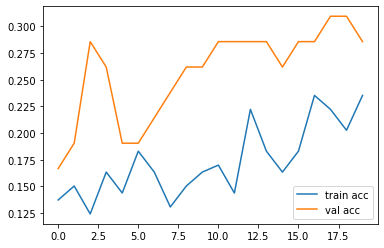

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [14]:
# save it as a h5 file


from tensorflow.keras.models import load_model

Classifier.save('model_Classifier.h5')

In [15]:
y_pred = Classifier.predict(test_set)

In [16]:
y_pred

array([[0.14223902, 0.08142339, 0.1644957 , 0.15677746, 0.24623561,
        0.09345316, 0.11537571],
       [0.12345911, 0.15012833, 0.09257951, 0.15044531, 0.19164488,
        0.16272427, 0.1290186 ],
       [0.07710431, 0.14433555, 0.13555662, 0.17223035, 0.09819421,
        0.16426337, 0.20831566],
       [0.14223902, 0.08142339, 0.1644957 , 0.15677746, 0.24623561,
        0.09345316, 0.11537571],
       [0.11319915, 0.22568154, 0.10465708, 0.16429074, 0.09476887,
        0.10196029, 0.19544232],
       [0.13252747, 0.16330701, 0.16232954, 0.19044526, 0.17353754,
        0.09469127, 0.08316183],
       [0.21219777, 0.14412871, 0.112888  , 0.11178727, 0.1495453 ,
        0.16896044, 0.10049253],
       [0.17503276, 0.14385921, 0.1616104 , 0.14793241, 0.20097329,
        0.0956086 , 0.07498326],
       [0.16880576, 0.15561004, 0.13293561, 0.18321262, 0.10210767,
        0.1372374 , 0.12009092],
       [0.13881248, 0.10243381, 0.08307049, 0.07040891, 0.13452236,
        0.17040974, 0.3

In [17]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [18]:
y_pred

array([4, 4, 6, 4, 1, 3, 0, 4, 3, 6, 0, 4, 6, 2, 4, 3, 4, 1, 3, 4, 0, 2,
       1, 3, 0, 4, 6, 6, 3, 1, 3, 1, 0, 1, 0, 2, 3, 3, 5, 6, 3, 2])

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [20]:
model=load_model('model_Classifier.h5')

In [21]:
img=image.load_img('../input/indian-currency-notes-classifier/Test/2Thousandnote/3.jpg',target_size=(224,224))

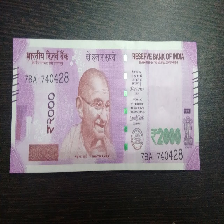

In [22]:
img

In [23]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

In [24]:
result = Classifier.predict(test_image)
result

array([[5.1492790e-12, 1.6618158e-06, 3.8339870e-29, 9.9999833e-01,
        1.8557138e-37, 7.5457578e-25, 5.0245002e-35]], dtype=float32)

In [25]:
list_of_notes = ['100', '200', '2000', '500', '50', '10', '20']

In [26]:
print(f'This is a {list_of_notes[np.argmax(result)]} rupee note')

This is a 500 rupee note
